## **PREPROCESSING**

Sumber: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

## **Import Function**

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Read Dataset**

In [4]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### **Deskripsi Setiap Atribut**

In [5]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", df.shape[0])
print("Kolom : ", df.shape[1])

----Informasi Baris dan Kolom----
Baris :  4521
Kolom :  17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### **Jumlah Duplikasi Data**

In [7]:
df.duplicated().sum()

0

### **Jumlah Missing Values**

In [8]:
df.isnull().sum().sum()

0

### **Visualisasi Data**

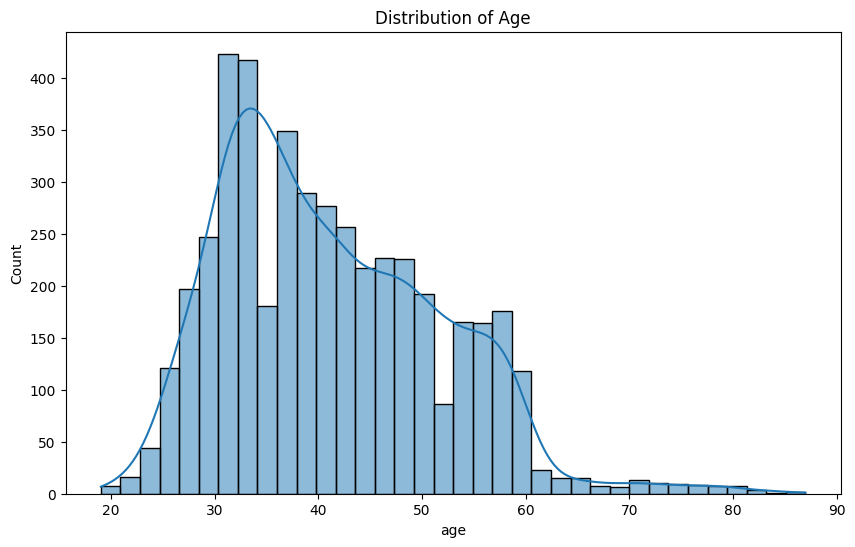

In [40]:
#Visualisasi distribusi usia menggunakan Histogram

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title("Distribution of Age")
plt.show()

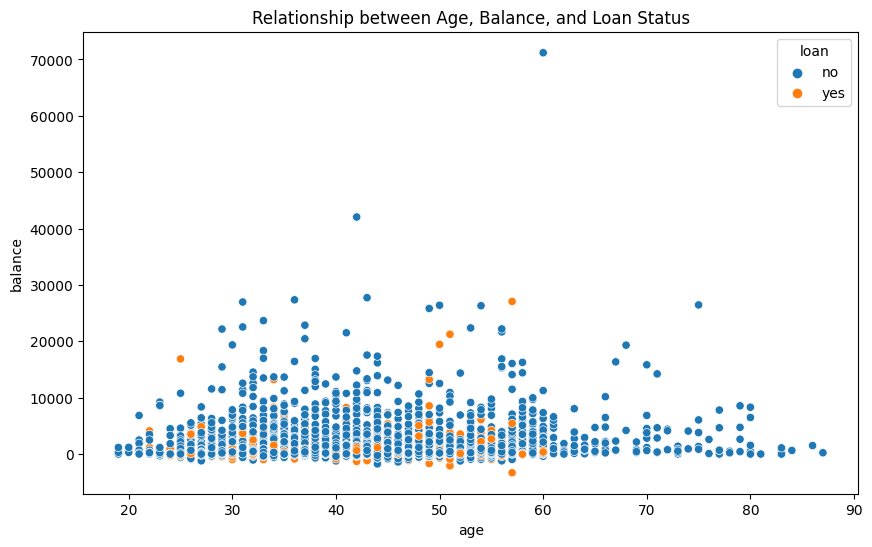

In [52]:
#Visualisasi distribusi usia menggunakan scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="balance", hue="loan")
plt.title("Relationship between Age, Balance, and Loan Status")
plt.show()

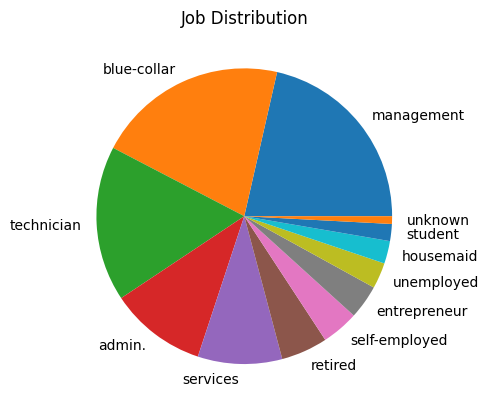

In [51]:
#Visualisasi distribusi usia menggunakan Pie Chart
job_counts = df['job'].value_counts()
plt.pie(job_counts, labels=job_counts.index)
plt.title('Job Distribution')
plt.show()

### **LOGISTIC REGRESSION**

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
# Membagi data menjadi training dan testing set
from sklearn.model_selection import train_test_split
obj_cols = df.select_dtypes(include=['object']).columns
X = df.drop(obj_cols, axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing

In [13]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)
y_logistic_predict = logistic.predict(X_test_scaled)

print(y_logistic_predict)

['no' 'no' 'no' ... 'no' 'no' 'yes']


In [14]:
print("Confusion Matrix")
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_logistic_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
display(df_confusion)

Confusion Matrix


prediction,no,yes
actual,,
no,1201,19
yes,123,14


In [15]:
print("Nilai rata-rata akurasi:", logistic.score(X_test_scaled, y_test))

Nilai rata-rata akurasi: 0.8953574060427414


### **KNN**

In [16]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [17]:
# encode target terlebih dahulu menjadi numerik dengan natural progression (label encoder)

# menggunakan label encoder
data_knn = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_knn["y"] = le.fit_transform(data_knn["y"])
data_knn.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [18]:
obj_cols = data_knn.select_dtypes(include=['object']).columns
X_raw = data_knn.drop(obj_cols, axis=1)

In [19]:
obj_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [20]:
X_raw

,age,balance,day,duration,campaign,pdays,previous,y
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0
...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0
4517,57,-3313,9,153,1,-1,0,0
4518,57,295,19,151,11,-1,0,0
4519,28,1137,6,129,4,211,3,0


In [21]:
y = X_raw["y"]
X_raw = X_raw.drop(["y"],axis=1)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [23]:
selector = SelectKBest(f_classif, k=2) # kita akan memilih 2 variable terbaik dari features kita
X = selector.fit_transform(X_raw, y)


In [24]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 7
Jumlah feature (setelah dilakukan feature selection ) : 2


In [25]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['duration', 'previous'], dtype=object)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing

In [29]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5) # kita akan menggunakan nilai 5 untuk k terlebih dahulu
KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [30]:
y_pred = KNN.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Informasi lebih lengkap di bawah ini : ")
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [32]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       801
           1       0.49      0.28      0.36       104

    accuracy                           0.88       905
   macro avg       0.70      0.62      0.65       905
weighted avg       0.86      0.88      0.87       905



Confusion Matrix



prediction,0,1
actual,,
0,771,30
1,75,29




Informasi lebih lengkap di bawah ini : 
F1 Macro Average: 0.6460379719959324
F1 Micro Average: 0.8839779005524862
Precision Macro Average: 0.701436470729655
Precision Micro Average: 0.8839779005524862
Recall Macro Average: 0.6206964851627773
Recall Micro Average: 0.8839779005524862



In [33]:
print("Nilai rata-rata akurasi:", KNN.score(X_test_scaled, y_test))

Nilai rata-rata akurasi: 0.8839779005524862


### **DECISION TREE**

In [34]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
# dengan jumlah test set adalah sebanyak 25% dari data keseluruhan 
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.25, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)
predicted1 = dt1.predict(X_test)
evaluate_classifier_performance(predicted1, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1006
           1       0.32      0.40      0.36       125

    accuracy                           0.84      1131
   macro avg       0.62      0.65      0.63      1131
weighted avg       0.86      0.84      0.85      1131



Confusion Matrix



prediction,0,1
actual,,
0,900,106
1,75,50




Informasi lebih lengkap di bawah ini : 
F1 Macro Average: 0.6322519450796805
F1 Micro Average: 0.8399646330680813
Precision Macro Average: 0.6217948717948718
Precision Micro Average: 0.8399646330680813
Recall Macro Average: 0.6473161033797217
Recall Micro Average: 0.8399646330680813



### **RANDOM FOREST**

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Melakukan training pada model random forest
rf_md = RandomForestClassifier()
rf_md.fit(X_train, y_train)

# Memprediksi data testing
predicted = rf_md.predict(X_test)

# Menampilkan metrics
from sklearn import metrics
evaluate_classifier_performance(predicted1, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1006
           1       0.32      0.40      0.36       125

    accuracy                           0.84      1131
   macro avg       0.62      0.65      0.63      1131
weighted avg       0.86      0.84      0.85      1131



Confusion Matrix



prediction,0,1
actual,,
0,900,106
1,75,50




Informasi lebih lengkap di bawah ini : 
F1 Macro Average: 0.6322519450796805
F1 Micro Average: 0.8399646330680813
Precision Macro Average: 0.6217948717948718
Precision Micro Average: 0.8399646330680813
Recall Macro Average: 0.6473161033797217
Recall Micro Average: 0.8399646330680813



### **NAIVE BAYES**

In [37]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(X_train, y_train)
y_pred = modelnb.predict(X_test)
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1006
           1       0.36      0.41      0.38       125

    accuracy                           0.85      1131
   macro avg       0.64      0.66      0.65      1131
weighted avg       0.86      0.85      0.86      1131



Confusion Matrix



prediction,0,1
actual,,
0,916,90
1,74,51




Informasi lebih lengkap di bawah ini : 
F1 Macro Average: 0.6506471589796133
F1 Micro Average: 0.8549955791335102
Precision Macro Average: 0.6434773264560498
Precision Micro Average: 0.8549955791335102
Recall Macro Average: 0.6592683896620278
Recall Micro Average: 0.8549955791335102



### **SVM**

In [39]:
from sklearn import svm 
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1006
           1       0.45      0.20      0.28       125

    accuracy                           0.89      1131
   macro avg       0.68      0.59      0.61      1131
weighted avg       0.86      0.89      0.86      1131



Confusion Matrix



prediction,0,1
actual,,
0,976,30
1,100,25




Informasi lebih lengkap di bawah ini : 
F1 Macro Average: 0.6076689081011848
F1 Micro Average: 0.8850574712643678
Precision Macro Average: 0.6808043257857385
Precision Micro Average: 0.8850574712643678
Recall Macro Average: 0.5850894632206759
Recall Micro Average: 0.8850574712643678

